<a href="https://colab.research.google.com/github/plaban1981/Auto-Sklearn/blob/master/AutoNLP_sentiment_analysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install autoviml

     |████████████████████████████████| 102kB 2.7MB/s 
     |████████████████████████████████| 64.8MB 56kB/s 
     |████████████████████████████████| 133kB 50.3MB/s 


In [0]:
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds

In [4]:
dataset,info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00',with_info=True,batch_size=-1)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0.incompleteHBL49R/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0. Subsequent calls will reuse this data.


In [5]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [0]:
train_dataset= tfds.as_numpy(dataset)

In [8]:
train_dataset

{'train': {'data': {'customer_id': array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
          b'35596948', b'29430209'], dtype=object),
   'helpful_votes': array([0, 3, 0, ..., 0, 0, 0], dtype=int32),
   'marketplace': array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object),
   'product_category': array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
          b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
          b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
         dtype=object),
   'product_id': array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
          b'B000NURPPK', b'B001EY5GNW'], dtype=object),
   'product_parent': array([b'997683625', b'955577225', b'120764066', ..., b'96066145',
          b'58591097', b'986877728'], dtype=object),
   'product_title': array([b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400',
          b'Straight Razor',
          b'Philips Sonicare Flexcare

In [0]:
helpful_votes = train_dataset['train']['data']['helpful_votes']
review_headline = train_dataset['train']['data']['review_headline']
review_body = train_dataset['train']['data']['review_body']
ratinge = train_dataset['train']['data']['star_rating']


https://github.com/AutoViML/Auto_ViML/blob/master/Auto_ViML_Demo.ipynb

In [15]:
df = pd.DataFrame({'votes':helpful_votes,'headline':review_headline,'body':review_body,'rating':ratinge})
df.head()

,votes,headline,body,rating
0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4
1,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5
2,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4
3,0,b'Five Stars',b'Top quality.',5
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3


In [14]:
df.shape

(85981, 4)

In [0]:
convert_dict = {'votes':int,'headline':str,'body':str,'rating':int}

In [0]:
df = df.astype(convert_dict)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85981 entries, 0 to 85980
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   votes     85981 non-null  int64 
 1   headline  85981 non-null  object
 2   body      85981 non-null  object
 3   rating    85981 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ MB


In [0]:
df['target'] = np.where(df['rating'] >= 4,1,0)

In [22]:
df.head()

,votes,headline,body,rating,target
0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4,1
1,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5,1
2,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4,1
3,0,b'Five Stars',b'Top quality.',5,1
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3,0


In [23]:
df.shape

(85981, 5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


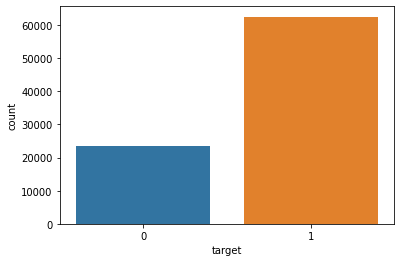

In [24]:
import seaborn as sns
sns.countplot(x='target',data=df)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(df,test_size=0.25,stratify=df['target'])

# Auto NLP

In [0]:
from autoviml.Auto_NLP import Auto_NLP

Auto NLP processing on NLP Column: body
Shape of Train Data: 64485 rows
    Shape of Test Data: 21496 rows


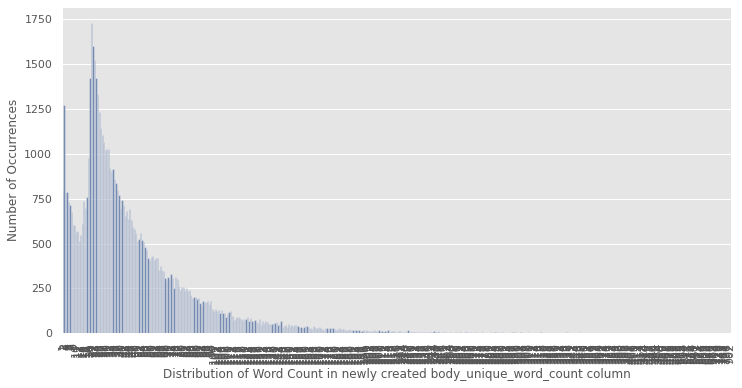

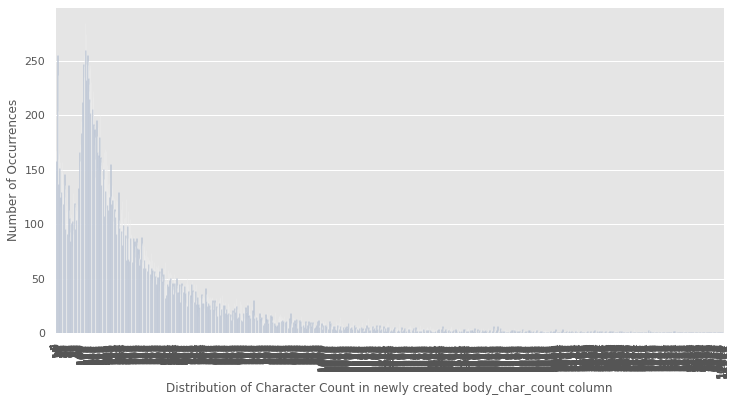

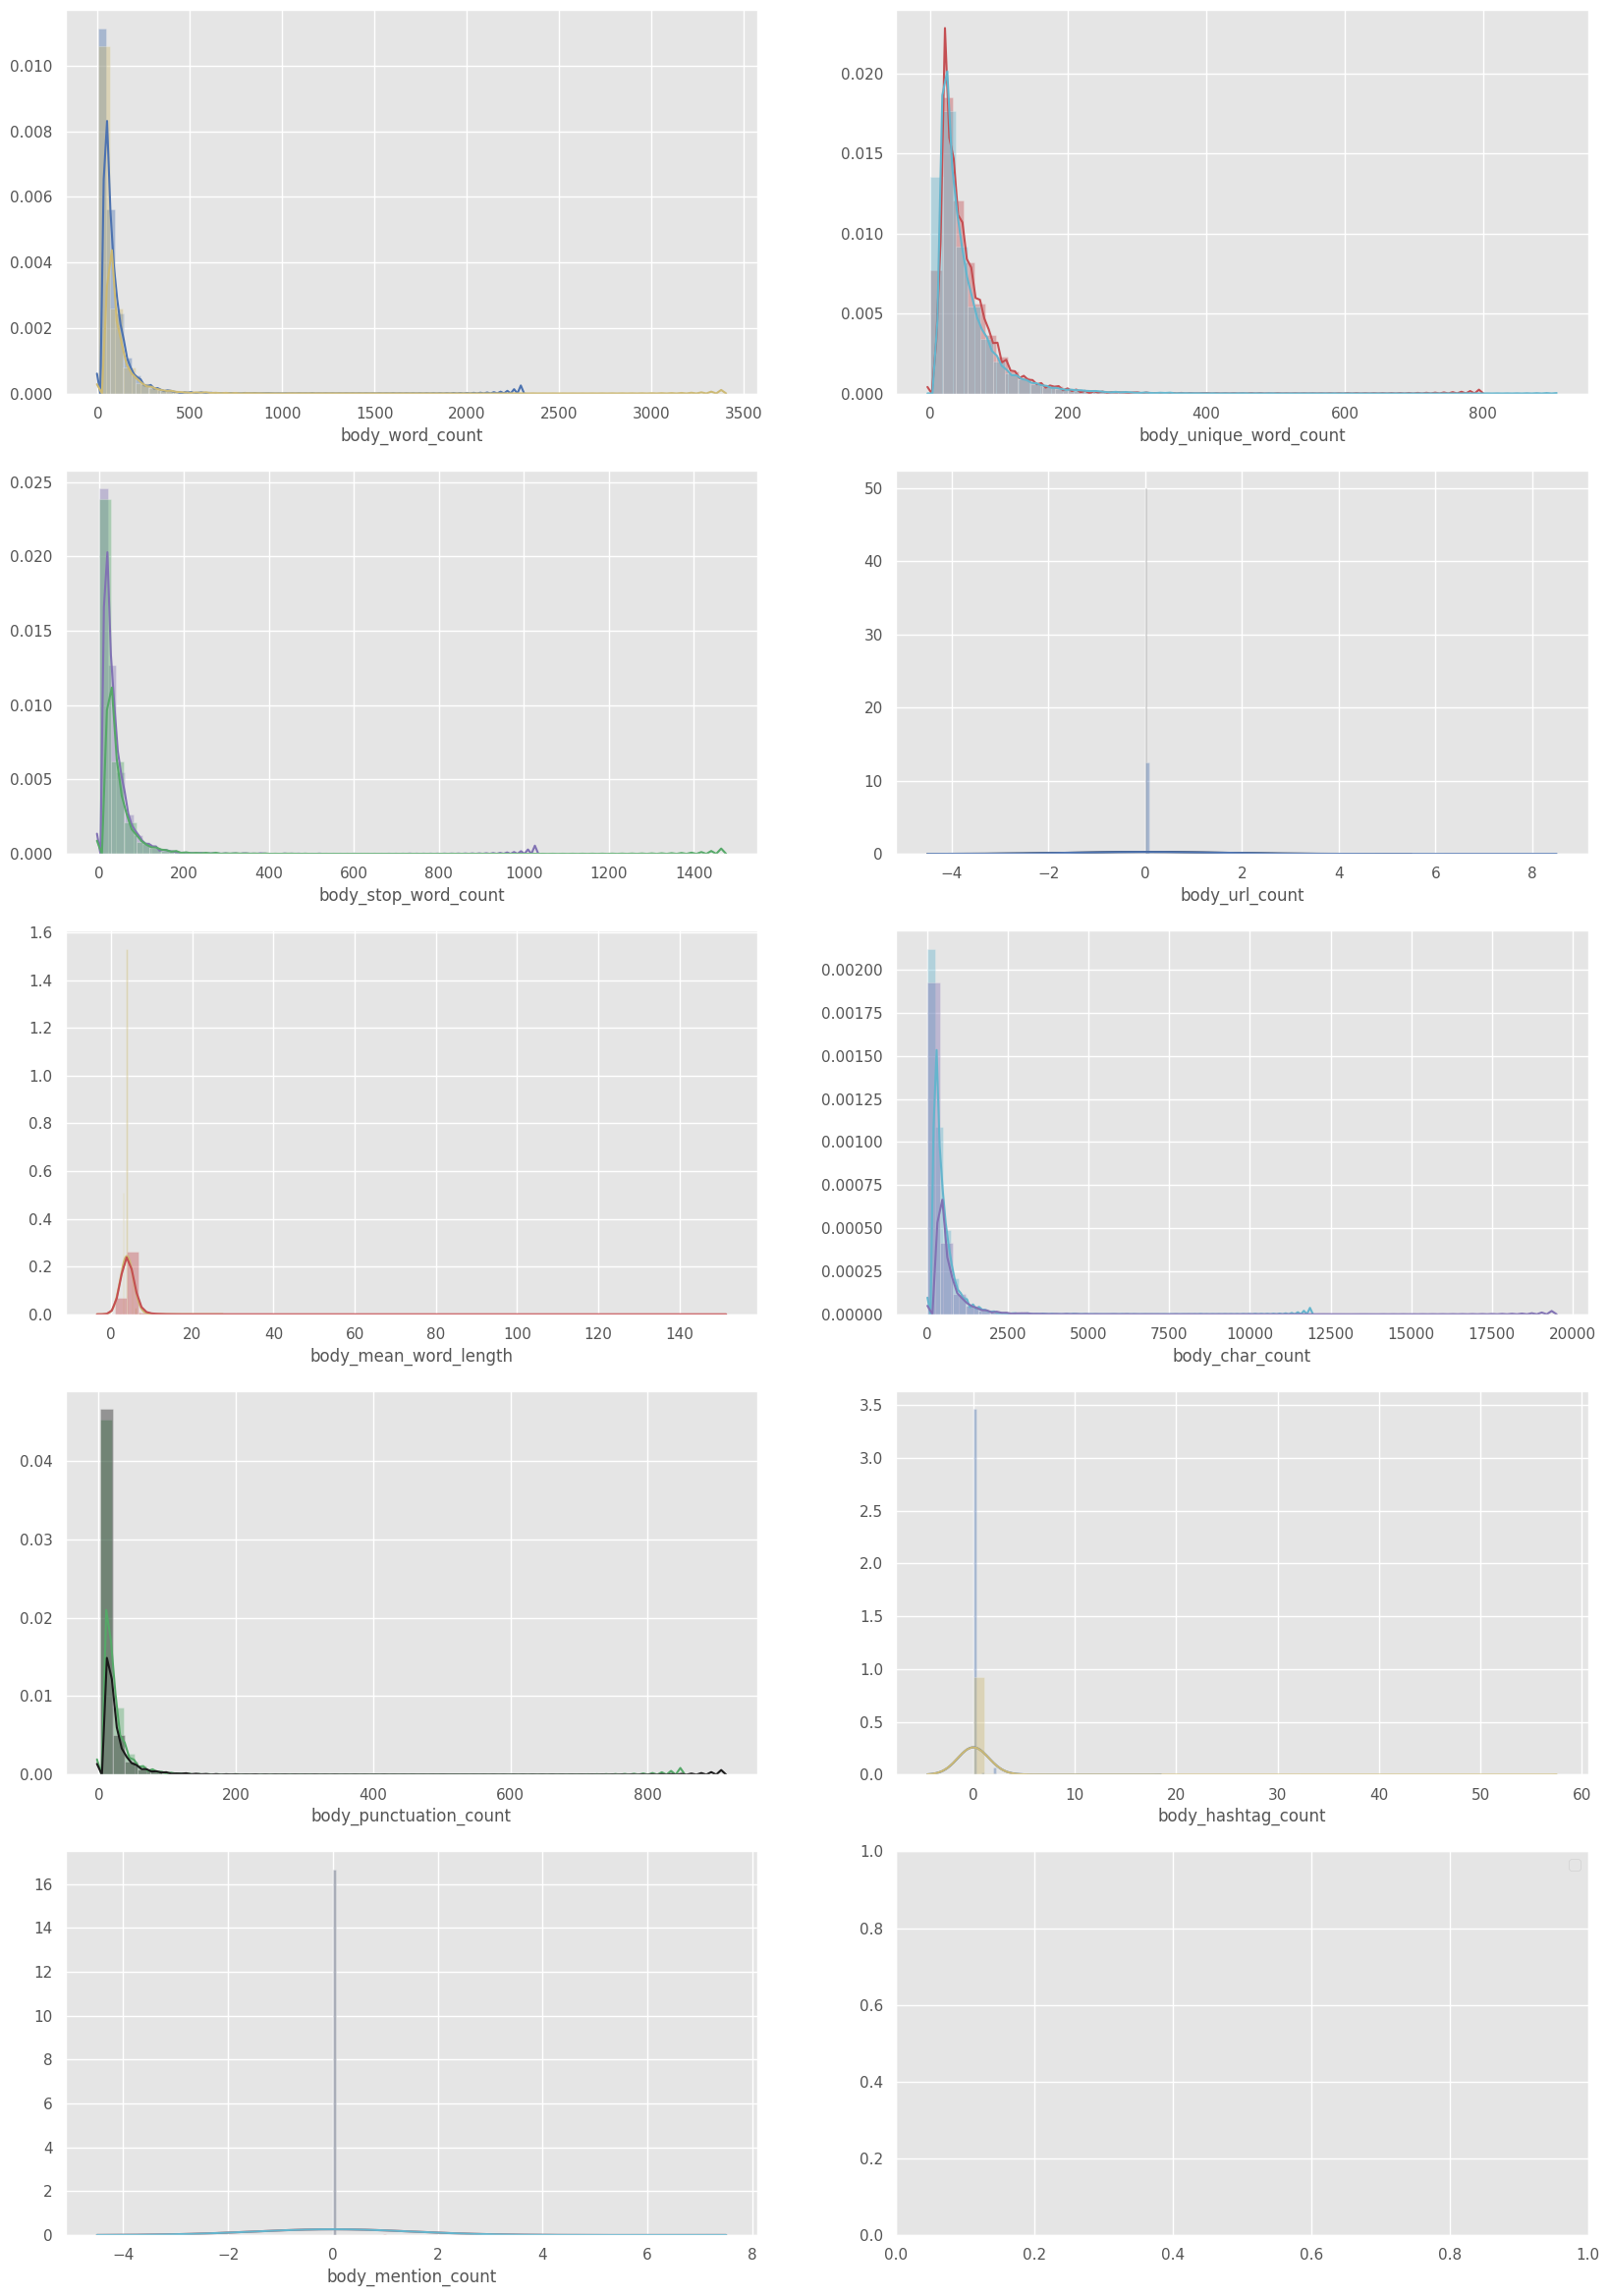

    Added 9 summary columns for counts of words and characters in each row
    Cleaning text in body before doing transformation...
Train and Test data Text cleaning completed. Time taken = 340 seconds
    A U T O - N L P   P R O C E S S I N G  O N   N L P   C O L U M N = body 
#################################################################################
Generating new features for NLP column = body using NLP Transformers
    Cleaning text in body before doing transformation...
    However max_features limit = 4846 will limit numerous features from being generated

#### Optimizing Count Vectorizer with best max_df=0.50, 1-3 n-grams and high features...
    balanced_accuracy Metrics for 4846 features = 0.7616

#### Using Count Vectorizer with limited max_features and a min_df=2 with n_gram (1-5)
    balanced_accuracy Metrics for 4846 features = 0.7845

# Using TFIDF vectorizer with min_df=2, ngram (1,3) and very high max_features
    balanced_accuracy Metrics for 4846 features = 0.8

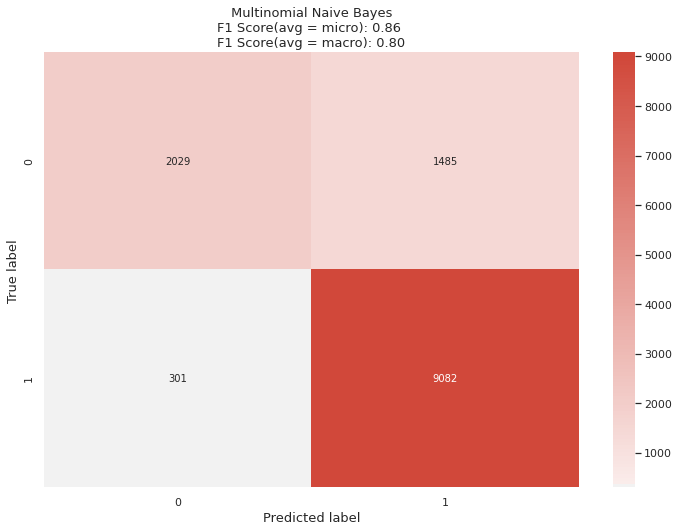

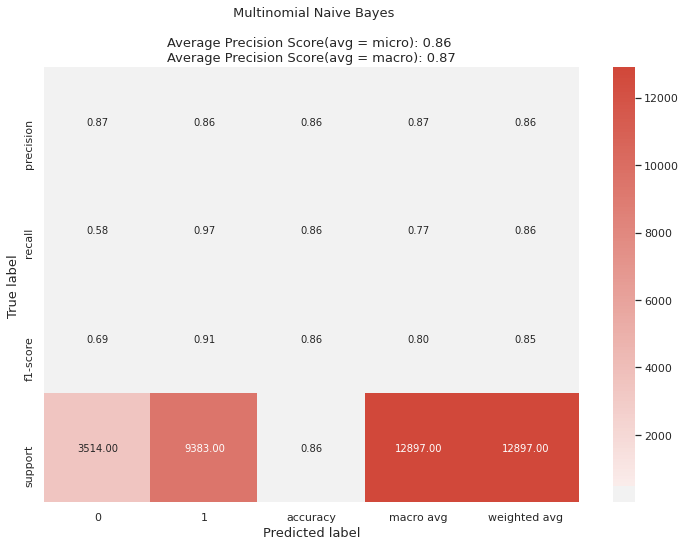

Training Pipeline on full Train data. This will take time...
    Time taken to train Pipeline on full Train shape ((64485,)) and test on ((21496, 14)) = 21.31 seconds
Time taken for Auto_NLP = 12.9 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [29]:
nlp_column ='body'
target = 'target'

train_nlp,test_nlp,bnlp_transformer,preds = Auto_NLP(nlp_column,X_train,X_test,target,score_type='balanced_accuracy',
                                                     modeltype='Classification',top_num_features=100,verbose=2,build_model=True)

# nlp pipeline

In [30]:
bnlp_transformer

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.5, max_features=4846,
                                 min_df=2, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents='unicode',
                                 sublinear_tf=True, token_pattern='\\w{1,}',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=0.006825733043655191, class_prior=None,
                               fit_prior=True))],
         verbose=False)

# Predictions

In [31]:
bnlp_transformer.predict(X_test[nlp_column])

array([1, 1, 1, ..., 1, 1, 0])